In [1]:
import yfinance as yf

def fetch_stock_price(stock_symbol, start_date, end_date):
    # 使用 yf.Ticker() 建立 Ticker 對象
    stock = yf.Ticker(stock_symbol)

    # 使用 history() 方法取得歷史價格資訊
    stock_data = stock.history(start=start_date, end=end_date)

    return stock_data

# 股票代碼：2330 台積電
stock_symbol = '2330.TW'

# 起始日期和結束日期
start_date = '2022-01-01'
end_date = '2022-12-31'

# 擷取股票價格資訊
stock_price_data = fetch_stock_price(stock_symbol, start_date, end_date)

# 輸出資訊
stock_price_data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2010-01-04 00:00:00+08:00,41.345861,41.345861,40.709771,41.282253,39407000,0.0,0
2010-01-05 00:00:00+08:00,41.345870,41.409478,40.646171,41.027824,37138000,0.0,0
2010-01-06 00:00:00+08:00,41.027816,41.282253,40.518945,41.282253,49261000,0.0,0
2010-01-07 00:00:00+08:00,41.282260,41.345868,40.836994,40.836994,42134000,0.0,0
2010-01-08 00:00:00+08:00,40.391740,40.900615,40.391740,40.709785,46076000,0.0,0


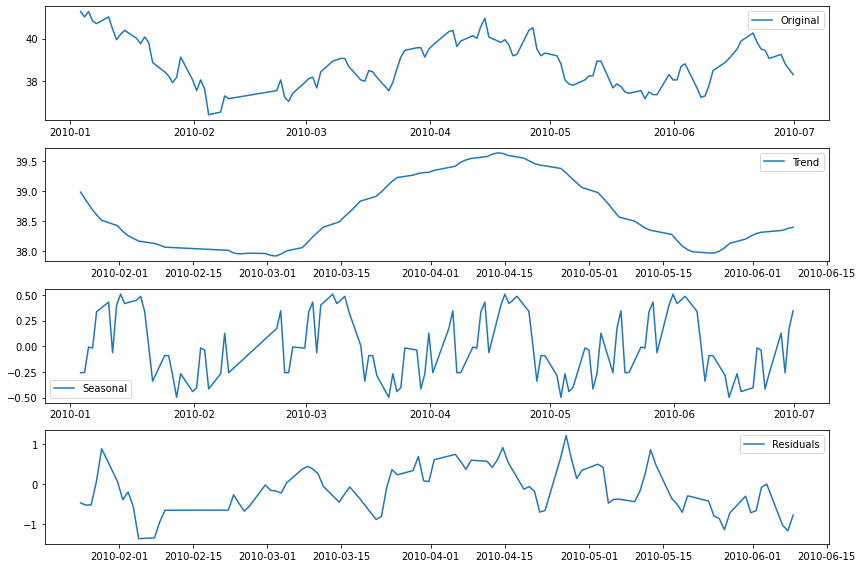

In [7]:
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

# Assuming your DataFrame is named df
# If not, replace df with the actual name of your DataFrame

# Select the first 30 rows of the 'Close' column
close_data = stock_price_data['Close'][:120]
# Create a datetime index if it's not already set
# df.index = pd.to_datetime(df.index)

# Decompose the time series
result = seasonal_decompose(close_data, model='additive', period=30)

# Plot the decomposition components
plt.figure(figsize=(12, 8))

plt.subplot(411)
plt.plot(close_data, label='Original')
plt.legend()

plt.subplot(412)
plt.plot(result.trend, label='Trend')
plt.legend()

plt.subplot(413)
plt.plot(result.seasonal, label='Seasonal')
plt.legend()

plt.subplot(414)
plt.plot(result.resid, label='Residuals')
plt.legend()

plt.tight_layout()
plt.show()


In [24]:
len(stock_price_data['Close'])

3190

In [31]:
260/4

65.0

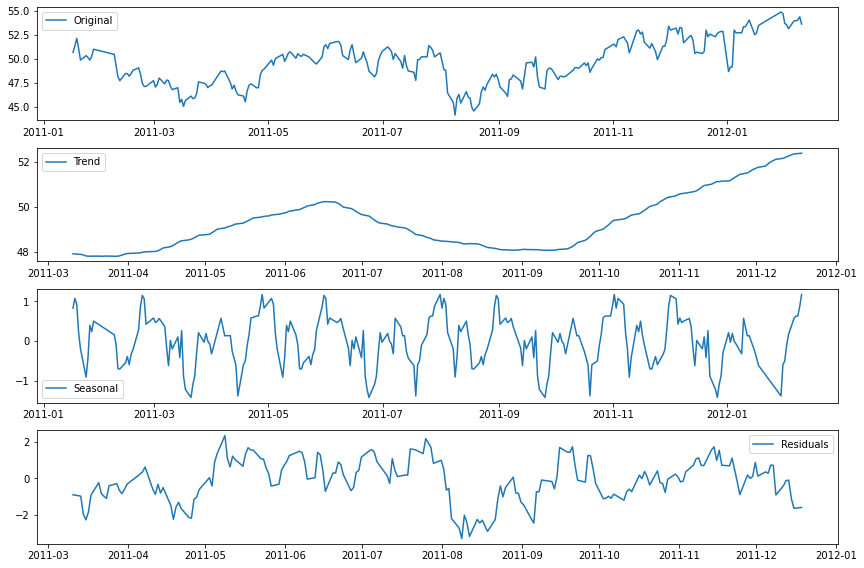

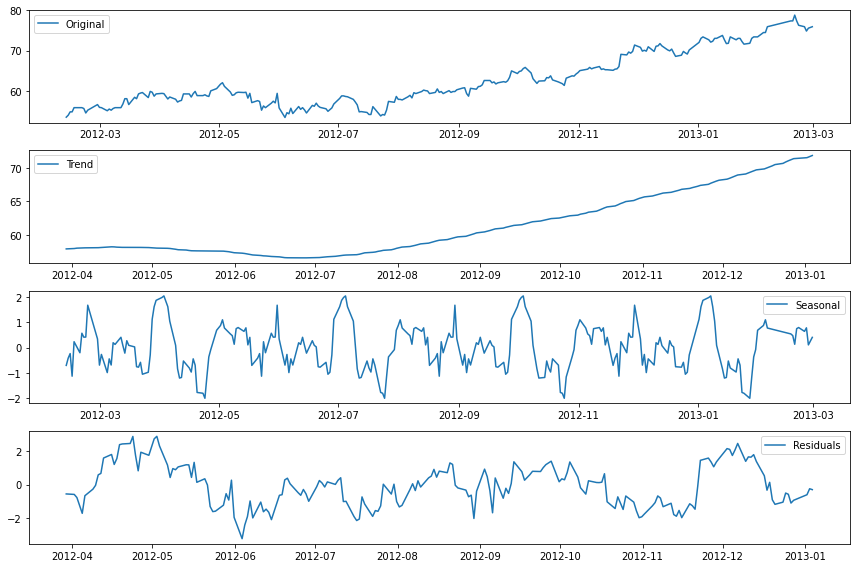

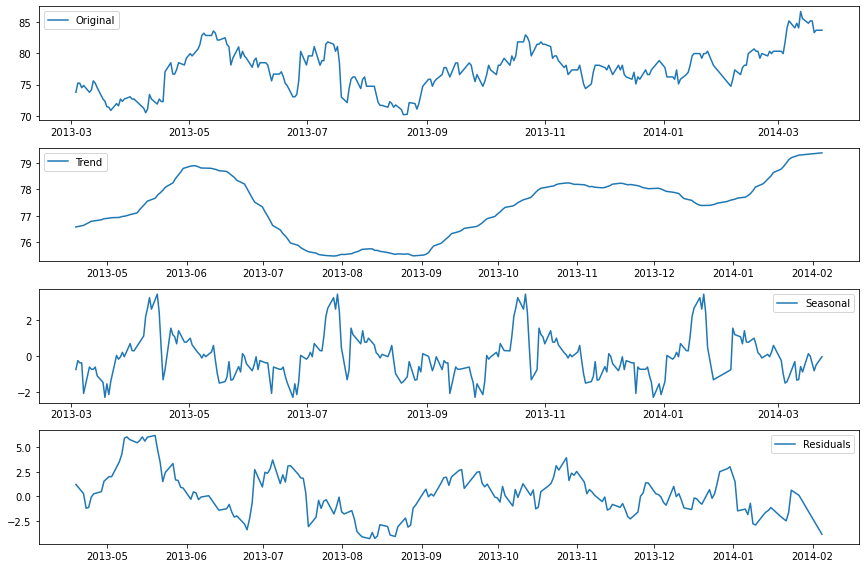

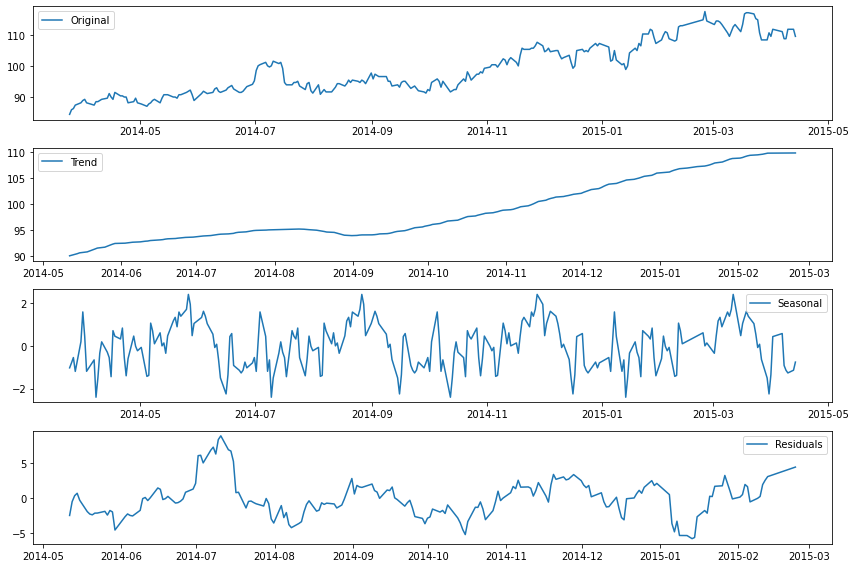

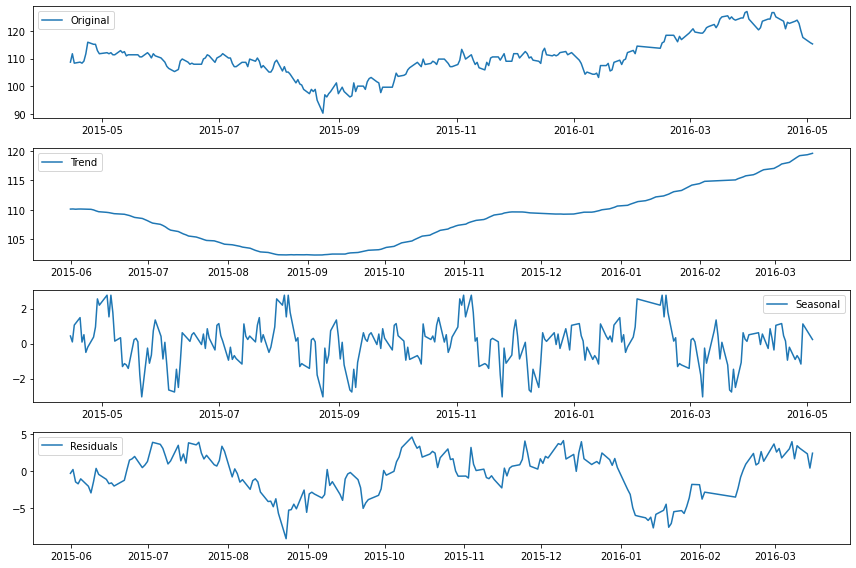

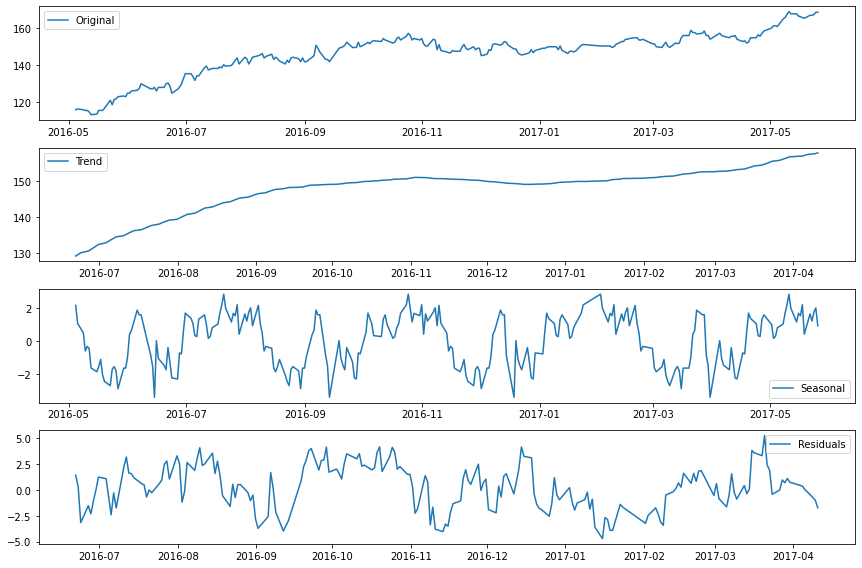

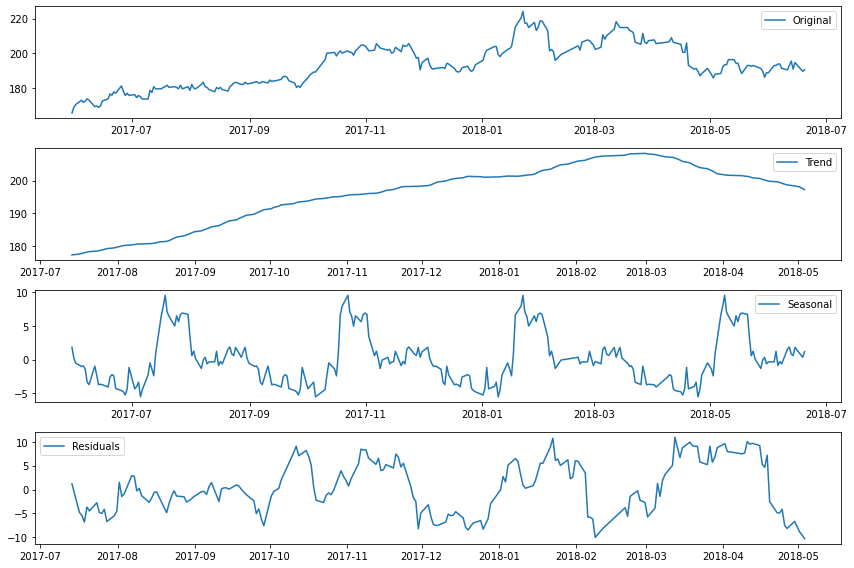

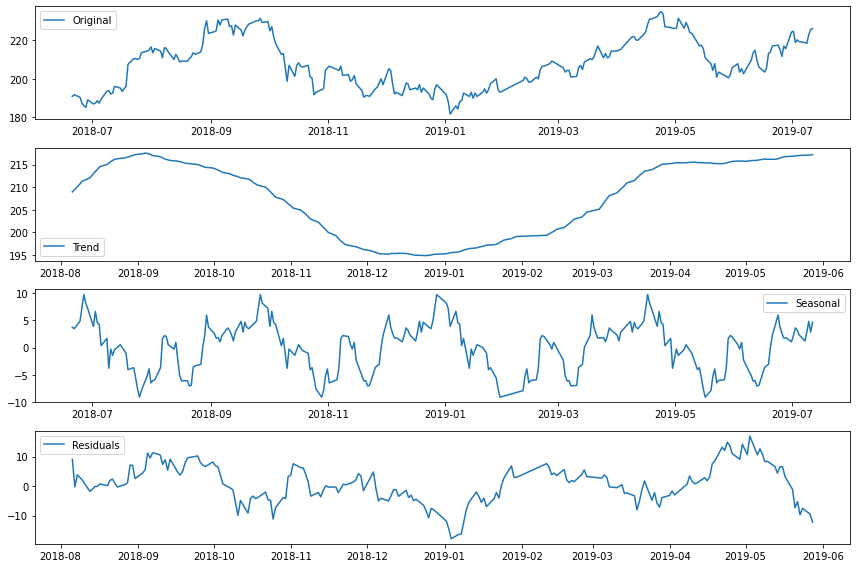

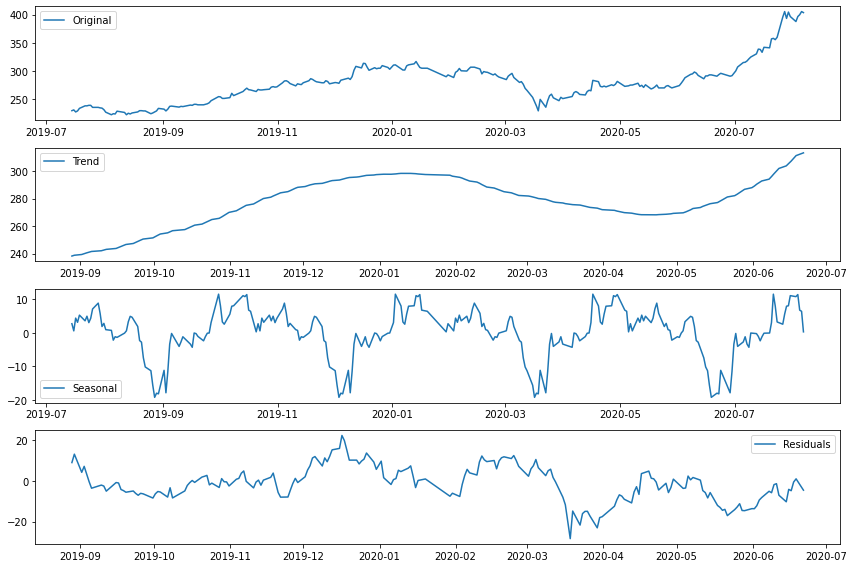

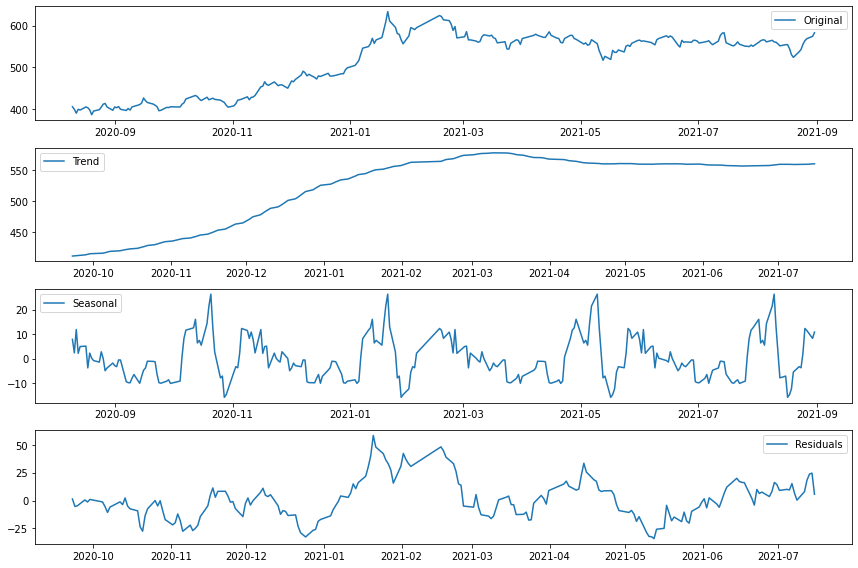

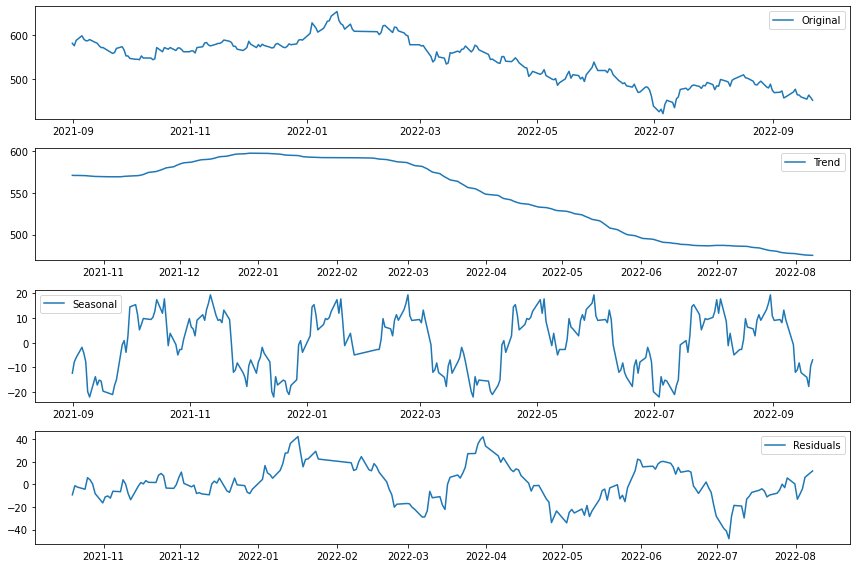

In [33]:
prev_i = [0]
ris = []
for i in range(0, len(stock_price_data['Close']), 260):
    prev_i.append(i)
    # print(prev_i[-2], i)
    if i!=0 and prev_i[-2]!=0:
        close_data = stock_price_data['Close'][prev_i[-2]:i]
        result = seasonal_decompose(close_data, model='additive', period=65)
        # Plot the decomposition components
        plt.figure(figsize=(12, 8))

        plt.subplot(411)
        plt.plot(close_data, label='Original')
        plt.legend()

        plt.subplot(412)
        plt.plot(result.trend, label='Trend')
        plt.legend()

        plt.subplot(413)
        plt.plot(result.seasonal, label='Seasonal')
        plt.legend()

        plt.subplot(414)
        plt.plot(result.resid, label='Residuals')
        ris.append(result.resid)
        plt.legend()

        plt.tight_layout()
        plt.show()

    